# Regression

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Experiment 1: predict sales based on spending on advertisement

__Detail__: given a historical dataset of budget spent on advertisement (three channels: TV, news paper, and radio) and sales over the span of four years, create a model to predict sales based advertisement spending for each channel.

In [3]:
root = '/content/drive/MyDrive/Interview/UPS/data'

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [51]:
ads_df = pd.read_csv(root+'/advertising_chennels.csv')
ads_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


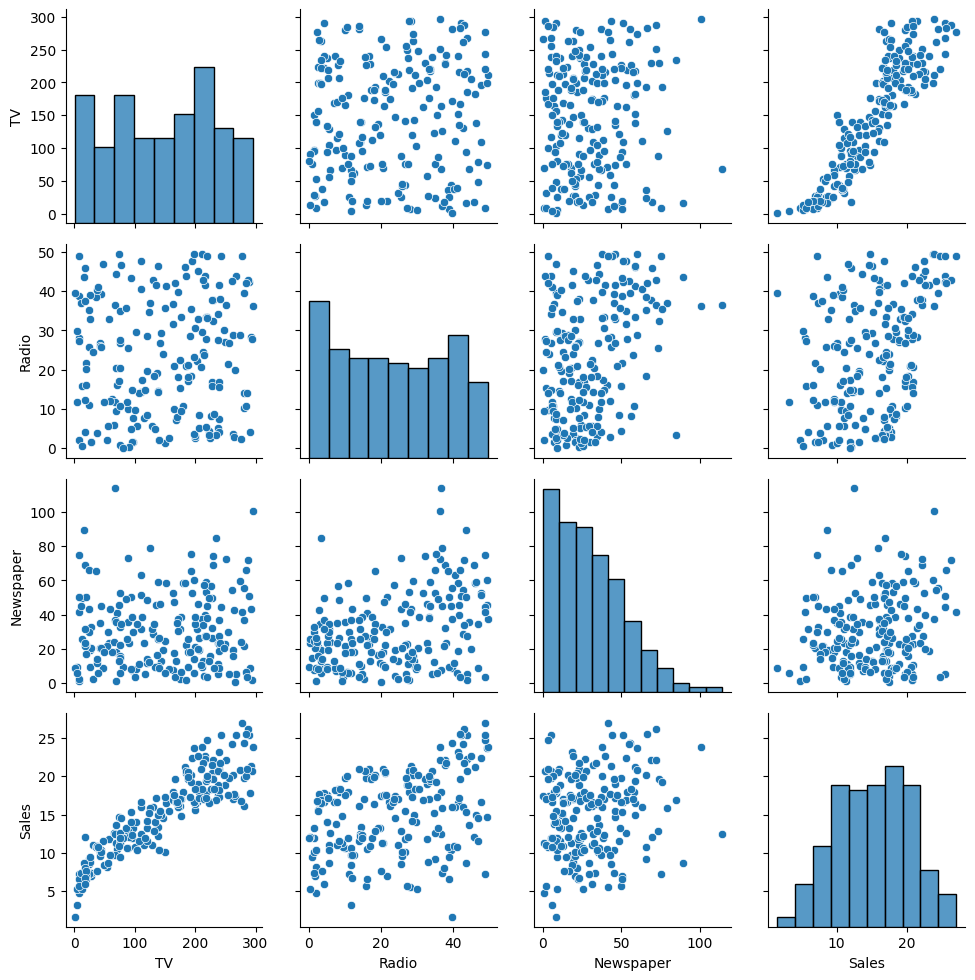

In [52]:
g = sns.PairGrid(ads_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [53]:
train_x, test_x, train_y, test_y = train_test_split(ads_df['TV'].values.reshape(-1, 1), ads_df['Sales'], test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(train_x, train_y)
sales_hat = model_lr.predict(test_x)

print('RMSE: ', np.sqrt(mean_squared_error(test_y, sales_hat)))
print('R2: ', r2_score(test_y, sales_hat))

RMSE:  2.470035001123256
R2:  0.802561303423698


In [54]:
ads_df.Sales.describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

## Experiment 2: identify high value customers

__Detail__ given historical purchase data, predict next year purchase to identify higher-value customers.



In [85]:
purchase_df = pd.read_csv(root+'/azra_retail_transactions.csv')
purchase_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom


In [86]:
display(purchase_df.describe(),
purchase_df.isnull().sum(),
purchase_df.info(),
purchase_df.shape,
purchase_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  int64  
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.3+ MB


,InvoiceNo,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,560616.934451,12.988238,3.116488,15294.423453
std,13106.117773,179.331775,22.097877,1713.141560
min,536365.000000,1.000000,0.001000,12346.000000
25%,549234.000000,2.000000,1.250000,13969.000000
50%,561893.000000,6.000000,1.950000,15159.000000
75%,572090.000000,12.000000,3.750000,16795.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

None

(397884, 8)

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [87]:
# feature engineering
purchase_df['InvoiceDate'] = pd.to_datetime(purchase_df['InvoiceDate'])

# create "Revenue" feature
purchase_df['Revenue'] = purchase_df['Quantity'] * purchase_df['UnitPrice']
purchase_df['Revenue'].describe()

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: Revenue, dtype: float64

In [88]:
purchase_df = pd.DataFrame(purchase_df
                           .groupby("InvoiceNo")
                           .agg({
                               "Revenue": "sum",
                               "InvoiceDate": "first",
                               "CustomerID": "first",
                               }
                                ),
                           )

In [90]:
purchase_df.reset_index(inplace=True)
purchase_df.head()

,InvoiceNo,Revenue,InvoiceDate,CustomerID
0,536365,139.12,2019-12-01 08:26:00,17850.0
1,536366,22.20,2019-12-01 08:28:00,17850.0
2,536367,278.73,2019-12-01 08:34:00,13047.0
3,536368,70.05,2019-12-01 08:34:00,13047.0
4,536369,17.85,2019-12-01 08:35:00,13047.0


In [101]:
purchase_df['days_since_Dec2019'] = (pd.to_datetime('2019-12-31') - purchase_df['InvoiceDate']).dt.days
purchase_df['Year'] = purchase_df['InvoiceDate'].dt.year

purchase_df.head()

,InvoiceNo,Revenue,InvoiceDate,CustomerID,days_since_Dec2019,Year
0,536365,139.12,2019-12-01 08:26:00,17850.0,29,2019
1,536366,22.20,2019-12-01 08:28:00,17850.0,29,2019
2,536367,278.73,2019-12-01 08:34:00,13047.0,29,2019
3,536368,70.05,2019-12-01 08:34:00,13047.0,29,2019
4,536369,17.85,2019-12-01 08:35:00,13047.0,29,2019


In [114]:
X = purchase_df[purchase_df['Year'] == 2019].groupby('CustomerID').agg({
    'Revenue': 'sum',
    'days_since_Dec2019': ['min', 'max','nunique']
    })

X.head(3)

Revenue days_since_Dec2019            
                sum                min max nunique
CustomerID                                        
12347.0      711.79                 23  23       1
12348.0      892.80                 14  14       1
12370.0     1868.02                 13  16       2

In [116]:
X.columns = ['_'.join(col) for col in X.columns.values]
X.head(3)

,Revenue_sum,days_since_Dec2019_min,days_since_Dec2019_max,days_since_Dec2019_nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,13,16,2


In [117]:
# Create y
y = purchase_df[purchase_df['Year'] == 2020].groupby('CustomerID')['Revenue'].sum()
y.head(3)

CustomerID
12346.0    77183.60
12347.0     3598.21
12348.0      904.44
Name: Revenue, dtype: float64

In [118]:
df = pd.concat([X, y], axis=1)
df.rename(columns={'Revenue_sum': 'Revenue_2019',
                   'Revenue': 'Revenue_2020'}, inplace=True)
df.head(3)

,Revenue_2019,days_since_Dec2019_min,days_since_Dec2019_max,days_since_Dec2019_nunique,Revenue_2020
CustomerID,,,,,
12347.0,711.79,23.0,23.0,1.0,3598.21
12348.0,892.80,14.0,14.0,1.0,904.44
12370.0,1868.02,13.0,16.0,2.0,1677.67


In [125]:
df.shape

(4338, 5)

In [126]:
# drop rows with null value
df = df[~df.Revenue_2019.isnull()]
df = df[~df.Revenue_2020.isnull()]
df.isnull().sum()

Revenue_2019                  0
days_since_Dec2019_min        0
days_since_Dec2019_max        0
days_since_Dec2019_nunique    0
Revenue_2020                  0
dtype: int64

In [129]:
# remove outliers : more or less than 3std
import scipy.stats as stats
df = df[np.abs(stats.zscore(df)) < 3 ]
df.shape

(766, 5)

In [132]:
df.rename(columns={'days_since_Dec2019_nunique':'count_purchases'}, inplace = True)
df.head(3)

,Revenue_2019,days_since_Dec2019_min,days_since_Dec2019_max,count_purchases,Revenue_2020
CustomerID,,,,,
12347.0,711.79,23.0,23.0,1.0,3598.21
12348.0,892.80,14.0,14.0,1.0,904.44
12370.0,1868.02,13.0,16.0,2.0,1677.67


__Sanity check__

<Axes: xlabel='Revenue_2020', ylabel='Revenue_2019'>

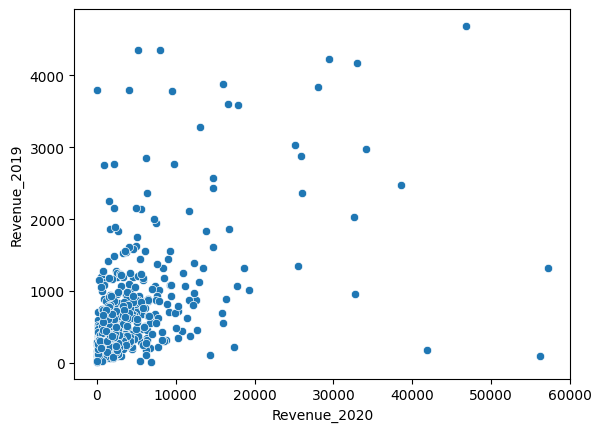

In [134]:
sns.scatterplot(data=df, x='Revenue_2020', y='Revenue_2019')

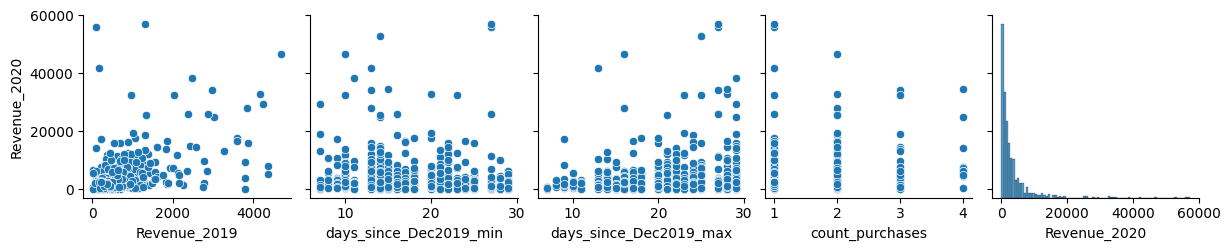

In [142]:
sns.pairplot(data=df, x_vars=df.columns, y_vars=['Revenue_2020'])

In [141]:
df.corr()

,Revenue_2019,days_since_Dec2019_min,days_since_Dec2019_max,count_purchases,Revenue_2020
Revenue_2019,1.000000,-0.254705,0.109268,0.444332,0.539619
days_since_Dec2019_min,-0.254705,1.000000,0.602482,-0.416474,-0.143569
days_since_Dec2019_max,0.109268,0.602482,1.000000,0.325718,0.092511
count_purchases,0.444332,-0.416474,0.325718,1.000000,0.269539
Revenue_2020,0.539619,-0.143569,0.092511,0.269539,1.000000


Based on the correlation values, exlude `days_since_Dec2019_max`

In [151]:
df.isnull().sum()

Revenue_2019               9
days_since_Dec2019_min     0
days_since_Dec2019_max     0
count_purchases            8
Revenue_2020              10
dtype: int64

In [152]:
df = df.dropna()
df.isnull().sum()

Revenue_2019              0
days_since_Dec2019_min    0
days_since_Dec2019_max    0
count_purchases           0
Revenue_2020              0
dtype: int64

In [153]:
df.shape

(747, 5)

In [154]:
X = df.drop(['days_since_Dec2019_max','Revenue_2020'], axis=1)
y = df['Revenue_2020']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

print(model_lr.score(X_test, y_test))
np.corrcoef(model_lr.predict(X_test), y_test)


0.11900881373164252


array([[1.       , 0.3532225],
       [0.3532225, 1.       ]])

__Weak R2 score, and not a strong correlation__

## Experment 3 - predict store revenue

In [161]:
df_store = pd.read_csv(root+'/location_rev.csv')
df_store.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [162]:
df_store.isnull().sum()

revenue                0
num_competitors        0
median_income          0
num_loyalty_members    0
population_density     0
location_age           0
dtype: int64

In [163]:
df_store_stnd = df_store.copy(deep=True)


In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_store_stnd = scaler.fit_transform(df_store.drop(columns=['revenue'], axis=1))
df_store_stnd = pd.DataFrame(df_store_stnd, columns=df_store.drop(columns=['revenue'], axis=1).columns)
df_store_stnd['revenue'] = df_store['revenue']
df_store_stnd.head()

,num_competitors,median_income,num_loyalty_members,population_density,location_age,revenue
0,-0.390912,-0.211376,-0.382984,-0.050451,0.316150,42247.80
1,-0.390912,-0.298170,-1.152174,1.098059,-0.013516,38628.37
2,-2.360241,0.208452,-0.199748,-0.093521,0.316150,39715.16
3,1.578417,-0.414081,1.495692,0.998590,-0.343183,35593.30
4,0.593753,-0.169867,-1.510593,0.433564,-0.013516,35128.18


In [169]:
X = df_store_stnd.drop(columns=['revenue'], axis=1)
y = df_store_stnd['revenue']

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

print(f"R2 score: {model_lr.score(X_test, y_test)}\nIntercept: {model_lr.intercept_},\nCoefficients: {model_lr.coef_}")
np.corrcoef(model_lr.predict(X_test), y_test)

R2 score: 0.8086918921337007
Intercept: 38411.285960964386,
Coefficients: [-2122.01352944  6801.79390636  1743.93192797  4123.86473289
  6290.41846336]


array([[1.        , 0.89932768],
       [0.89932768, 1.        ]])

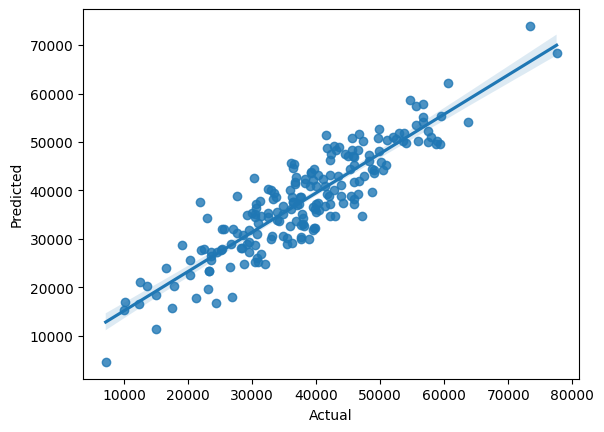

In [179]:
sns.regplot(x=y_test, y=model_lr.predict(X_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Experiment 4 - Evaluate which factor has more impact on revenue

Given a historical data of revenue generated by different stores, analyze which factor has more impact on the review.


In [181]:
revenue_df = pd.read_csv(root+'/location_rev.csv')
revenue_df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [182]:
revenue_df.isnull().sum()

revenue                0
num_competitors        0
median_income          0
num_loyalty_members    0
population_density     0
location_age           0
dtype: int64

In [183]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   revenue              1000 non-null   float64
 1   num_competitors      1000 non-null   float64
 2   median_income        1000 non-null   float64
 3   num_loyalty_members  1000 non-null   float64
 4   population_density   1000 non-null   float64
 5   location_age         1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [186]:
revenue_df_stand  = revenue_df.copy(deep=True)

#--------------Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
revenue_df_stand = scaler.fit_transform(revenue_df.drop(columns=['revenue'], axis=1))
revenue_df_stand = pd.DataFrame(revenue_df_stand, columns=revenue_df.drop(columns=['revenue'], axis=1).columns)
revenue_df_stand['revenue'] = revenue_df['revenue']
revenue_df_stand.head()

,num_competitors,median_income,num_loyalty_members,population_density,location_age,revenue
0,-0.390912,-0.211376,-0.382984,-0.050451,0.316150,42247.80
1,-0.390912,-0.298170,-1.152174,1.098059,-0.013516,38628.37
2,-2.360241,0.208452,-0.199748,-0.093521,0.316150,39715.16
3,1.578417,-0.414081,1.495692,0.998590,-0.343183,35593.30
4,0.593753,-0.169867,-1.510593,0.433564,-0.013516,35128.18


### Step 1

In [196]:
# plit tran 70% - test 30%

from sklearn.model_selection import train_test_split
X = revenue_df_stand.drop(columns=['revenue'], axis=1)
y = revenue_df_stand['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# linear regression on different factors and compare MAE and RMSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model_lr = LinearRegression()
factors = revenue_df_stand.drop(columns=['revenue'], axis=1).columns
Errors = {}
for factor in factors:
  model_lr.fit(X_train[[factor]], y_train)
  y_hat = model_lr.predict(X_test[[factor]])
  Errors[factor] = {'MAE': mean_absolute_error(y_test, y_hat),
                    'RMSE': np.sqrt(mean_squared_error(y_test, y_hat))
                    }
  Errors

{'num_competitors': {'MAE': 9021.144049693437, 'RMSE': 11542.66234955171},
 'median_income': {'MAE': 7781.855079949157, 'RMSE': 9577.198735449658},
 'num_loyalty_members': {'MAE': 9032.330561888433, 'RMSE': 11434.539138277461},
 'population_density': {'MAE': 8488.829960933554, 'RMSE': 10848.42717937502},
 'location_age': {'MAE': 7288.966430668446, 'RMSE': 9466.940839851917}}

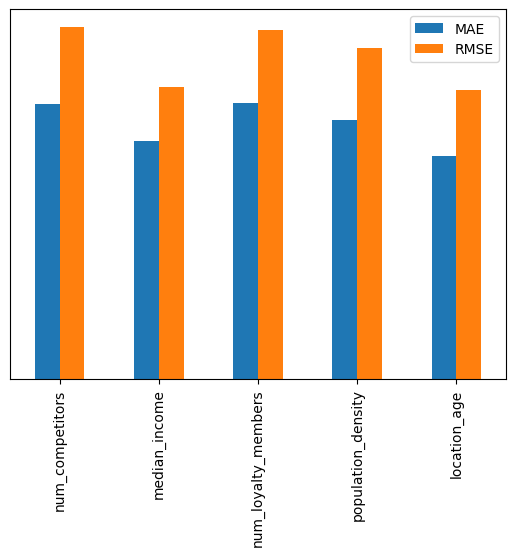

In [229]:
df = pd.DataFrame(Errors).T
df.plot(kind='bar')
plt.y ticks([])
plt.show()

__Locaton age__ has the lowest error, when predicting the revenue. The second important factor is __median income__ of the customers who purchase at each location.

## Experiment 5 - given the responses count from previous marketing campaign, predict most important factor

List of factors:
- amount of discount
- number of customers received the offer
- offer quality (assigned by marketing team)


__Approach__: recursive feature elimination (RFE)

In [230]:
marketing_df = pd.read_csv(root+'/offer_responses.csv')
marketing_df.head()

,responses,offer_discount,offer_quality,offer_reach
0,4151.0,26.0,10.257680,31344.0
1,3397.0,35.0,15.194380,24016.0
2,3274.0,21.0,13.971468,28832.0
3,3426.0,27.0,6.054338,26747.0
4,5745.0,42.0,16.801365,46968.0


In [231]:
marketing_df.isnull().sum()

responses         0
offer_discount    0
offer_quality     0
offer_reach       0
dtype: int64

In [237]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# standardise features
marketing_df_stand = marketing_df.copy(deep=True)
scaler = StandardScaler()
marketing_df_stand = scaler.fit_transform(marketing_df.drop(columns=['responses'], axis=1))

# create dataframe
marketing_df_stand = pd.DataFrame(marketing_df_stand, columns=marketing_df.drop(columns=['responses'], axis=1).columns)
marketing_df_stand['responses'] = marketing_df['responses']

#split to train/test
X = marketing_df_stand.drop(columns=['responses'], axis=1)
y = marketing_df_stand['responses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model
rfe = RFE(estimator = LinearRegression(), n_features_to_select = 3)
rfe.fit(X_train, y_train)

# generate results
for featureNum in range(X_train.shape[1]):
  if rfe.support_[featureNum] == True:
    print(f"Feature: {X_train.columns[featureNum]}, Rank: {rfe.ranking_[featureNum]}")

Feature: offer_discount, Rank: 1
Feature: offer_quality, Rank: 1
Feature: offer_reach, Rank: 1


In [235]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_hat = model_lr.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_hat))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))
print('R2: ', r2_score(y_test, y_hat))

MAE:  811.0080655987296
RMSE:  1047.5707212480056
R2:  0.4090433063227923


__All three features are equaly importatnt, but the linear model if not a good fit for this dataset.__

# Tree-based regression model

## Experiment: employ Random-Forest to predict customer spending based on demographic information



In [4]:
df_cust = pd.read_csv(root+'/spend_age_income_ed.csv')
df_cust.head()

,spend,age,income,years_of_education
0,3304.0,36.0,45125.0,12
1,3709.0,43.0,41695.0,10
2,3305.0,47.0,39253.0,17
3,2170.0,33.0,32384.0,13
4,2113.0,30.0,33182.0,10


In [6]:
df_cust.info()
df_cust.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spend               1000 non-null   float64
 1   age                 1000 non-null   float64
 2   income              1000 non-null   float64
 3   years_of_education  1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


spend                 0
age                   0
income                0
years_of_education    0
dtype: int64

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

X = df_cust.drop(columns=['spend'], axis=1)
y = df_cust['spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



models = {
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    }
depths = [2, 4, 6, 8, 10]
Errors = {}

for model_name,model_class in models.items():
  for depth in depths:
    model = model_class(max_depth = depth)
    y_hat = model.fit(X_train, y_train).predict(X_test)
    Errors[f'{model_name}_MaxDepth_{depth}'] = {'MAE': mean_absolute_error(y_test, y_hat),
                                      'RMSE': np.sqrt(mean_squared_error(y_test, y_hat))
                                      }
Errors

{'DecisionTreeRegressor_MaxDepth_2': {'MAE': 216.45869225191183,
  'RMSE': 260.62588767859035},
 'DecisionTreeRegressor_MaxDepth_4': {'MAE': 106.01235491868421,
  'RMSE': 147.37837016140068},
 'DecisionTreeRegressor_MaxDepth_6': {'MAE': 105.58386583640844,
  'RMSE': 153.95587271130987},
 'DecisionTreeRegressor_MaxDepth_8': {'MAE': 116.80162717676848,
  'RMSE': 168.7685513179097},
 'DecisionTreeRegressor_MaxDepth_10': {'MAE': 126.77138044363043,
  'RMSE': 178.21017697625857},
 'RandomForestRegressor_MaxDepth_2': {'MAE': 216.0811980628867,
  'RMSE': 258.1747049952294},
 'RandomForestRegressor_MaxDepth_4': {'MAE': 97.5552862256705,
  'RMSE': 132.19836499868381},
 'RandomForestRegressor_MaxDepth_6': {'MAE': 97.34052924990756,
  'RMSE': 129.79383557380004},
 'RandomForestRegressor_MaxDepth_8': {'MAE': 99.65208893377911,
  'RMSE': 132.0439208028095},
 'RandomForestRegressor_MaxDepth_10': {'MAE': 100.24783356707151,
  'RMSE': 132.80704546764375}}

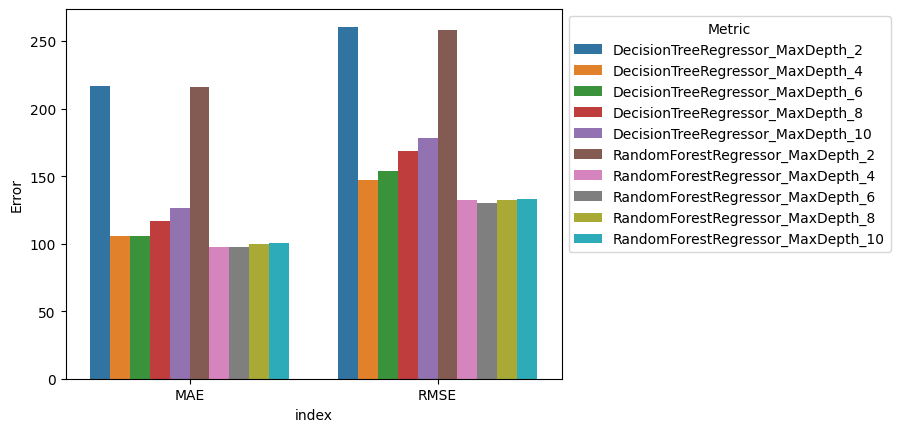

In [34]:
error_df = pd.DataFrame(Errors)
error_df_melted = error_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Error')
g = sns.barplot(data=error_df_melted, x='index', y='Error', hue='Metric')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.show()

__RandomForest of depth 4-6 has lowest error__